In [8]:
import glob, re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from psrqpy import QueryATNF

### Fitting Orbital Period

In [9]:
# If you need to download the archival data onto your personal computer you may do so using this wget command. 
# !wget --no-parent -r 'https://www.gb.nrao.edu/~rlynch/files/20m-orbit/bestprof/' <-P $PATH>
# where $PATH is your desired directory to store the data. Default will be the directory where this notebook is saved.
# This notebook should be saved in the parent folder of the data with each set of pulsar observations in a separate subdirectory.
path = "J0437-4715" # point at the subdirectory you are looking at


In [10]:
t = []
P = []

for i, fname in enumerate(glob.glob(path + "/" + "*.pfd.*")):
    with open(fname) as file:
        contents = file.read()
        contents = contents.split("/n")[0].split("\n")

    if i == 0:
        # Pull the name of the pulsar you are working with for plotting purposes
        pulsar = re.search(pattern := re.compile(r"J\d{4}[-|+]\d{4}"), contents[0]).group()

    t.append(float(contents[4].split()[4]))  # barycenter epoch
    P.append(float(contents[18].split()[4])) # observed barycenter period

In [11]:
query = QueryATNF(params=["Jname", 'S1400', "PB", "A1", "ECC", "F0", "MinMass"], psrs=[pulsar])
query.table

ECC_ERR,F0,A1_ERR,ECC,F0_ERR,PB_ERR,S1400_ERR,PB,MINMASS,A1,S1400,JNAME
,Hz,s,,Hz,d,mJy,d,solMass,s,mJy,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str10
1.5e-09,173.6879458121843,5e-08,1.91811e-05,5e-13,4e-07,1.6,5.7410459,0.14028781285199107,3.36671444,150.2,J0437-4715


In [12]:
print(query.get_ephemeris(pulsar))

NAME      J0437-4715
JNAME     J0437-4715
PSRJ      J0437-4715
RAJ       04:37:15.8961737         	6.000000000000000e-07
DECJ      -47:15:09.110714         	0.000007000000000
PMRA      121.438999999999993      	0.002000000000000
PMDEC     -71.474999999999994      	0.002000000000000
PX        6.400000000000000        	0.050000000000000
POSEPOCH  54500
ELONG     50.468254929380144
ELAT      -67.872926774752955
PMELONG   86.013554315577181
PMELAT    -111.614402386077614
GL        253.394459330235719
GB        -41.963396759694255
RAJD      69.316234057083335       	2.500000000000000e-09
DECJD     -47.252530753888891      	1.944444444444444e-09
TYPE      HE
PML       62.870272830886478
PMB       126.108822610354522
DIST      0.156800000000000
DIST_DM   0.156000000000000
DIST_DM1  0.139000000000000
DIST1     0.156800000000000
DIST_A    0.156800000000000        	0.000300000000000
DMSINB    -1.768433886051310
ZZ        -0.077736483400915
XX        -8.333616740232936
YY        -0.11172944679746

Text(0.5, 0, 'Observed Spin Period (ms)')

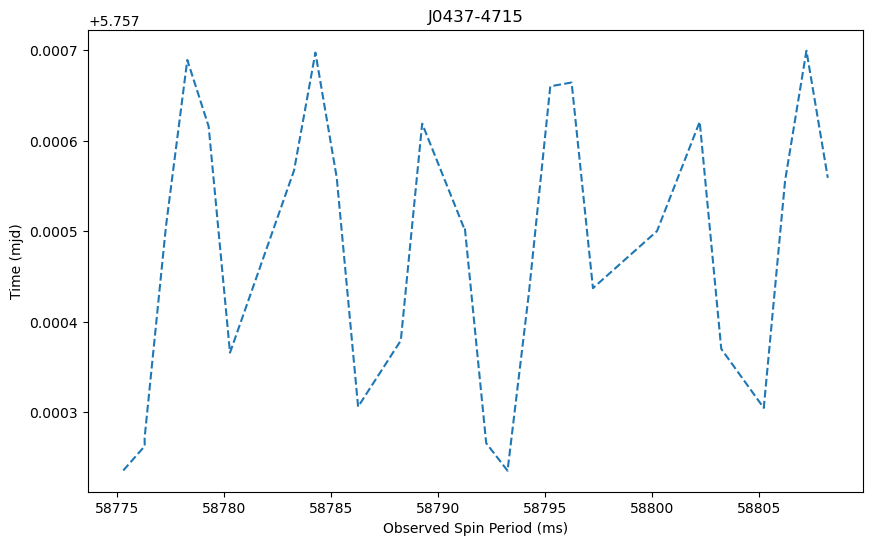

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(t, P, '--')
ax.set_title(pulsar)
ax.set_ylabel("Time (mjd)")
ax.set_xlabel("Observed Spin Period (ms)")

In [14]:
v_func = lambda t, T0, PB, A1, Pi: Pi * (1 + 2 * np.pi * A1 / PB * np.cos(2 * np.pi * (t - T0) / PB))
# p0 is the intial guesses for the fit params
p0 = [58790, 5.5, 0, 0.0005]
popt, pcov = curve_fit(v_func, t, P, p0) # p_optimal and p_covariance matrix
T0, PB, A1, Pi = popt

Text(0.5, 0, 'Observed Spin Period (ms)')

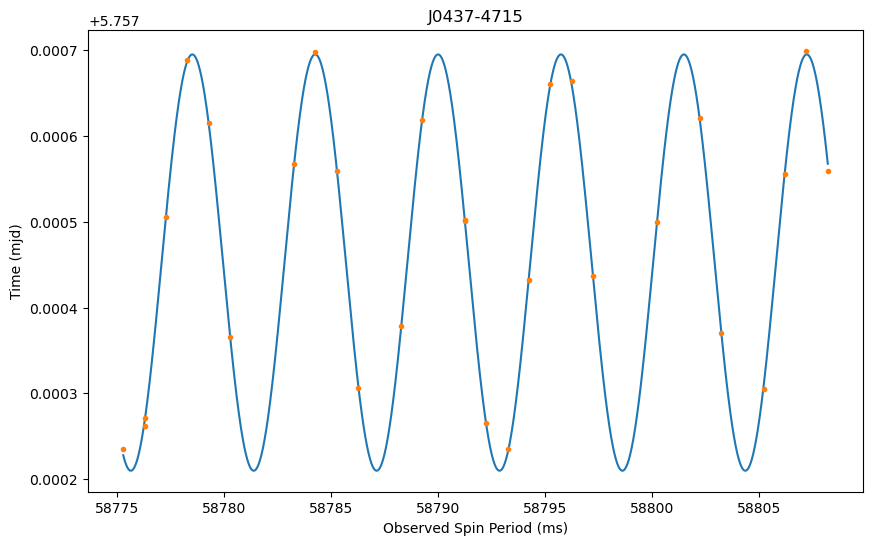

In [15]:
times = np.linspace(min(t), max(t), int(1e4))

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(times, v_func(times, T0, PB, A1, Pi))
ax.plot(t, P, '.')

ax.set_title(pulsar)
ax.set_ylabel("Time (mjd)")
ax.set_xlabel("Observed Spin Period (ms)")

In [16]:
print(T0, PB, A1, Pi)

58790.000579903346 5.740516051139736 3.849789374227853e-05 5.7574524498329875
